In [1]:
#Load SurveyModelTool, see github README for installation instructions
import survey_model_tool as smt
import warnings
warnings.filterwarnings('ignore')

JAX not found. Some functionality will be unavailable.


In [43]:
# Reload the package if updated for development purposes
import importlib
import survey_model_tool.survey_reader  # Example submodule
importlib.reload(survey_model_tool.survey_reader)
importlib.reload(survey_model_tool)

<module 'survey_model_tool' from 'C:\\Users\\Carson_H\\OneDrive - Santa Clara Valley Transportation Authority\\Documents\\GitHub\\Modeling_Warehouse\\SurveyTools\\Tools\\survey_model_tool\\__init__.py'>

In [2]:
#initialize survey reader with configuration file
survey = smt.SurveyReader(config='config/config.yml')



In [3]:
#to just read in survey data files, use read_data() function
survey.read_data()

In [4]:
survey.hh

,household_id,home_location,income,vehicles,hh_weight
0,1,1,100000,2,1.5
1,2,2,75000,1,1.2
2,3,3,120000,3,1.8


In [5]:
survey.person

,person_id,household_id,age,gender,employment_status,person_weight
0,1,1,35,1,1,1.1
1,2,1,33,2,1,1.0
2,3,2,40,2,2,1.3
3,4,3,25,1,3,1.2


In [6]:
survey.trips

,trip_id,person_id,origin,destination,mode,distance,trip_weight
0,1,1,1,2,1,15,0.9
1,2,2,2,3,2,45,1.1
2,3,3,3,1,3,50,1.0
3,4,4,1,3,4,40,1.2


In [7]:
#use the preprocessor and attach codebook values using the process_data() function
survey.preprocess_data()

In [8]:
#descriptive labels from the codebook have been added
survey.trips

,trip_id,person_id,origin,destination,mode,distance,trip_weight
0,1,1,San Francisco,Oakland,Car,15,0.9
1,2,2,Oakland,San Jose,Train,45,1.1
2,3,3,San Jose,San Francisco,Bike,50,1.0
3,4,4,San Francisco,San Jose,Bus,40,1.2


In [9]:
#custom transformations have been applied
survey.hh

,household_id,home_location,income,vehicles,hh_weight,income_bin,income_label,zero_auto
0,1,San Francisco,100000,2,1.5,2,> $100K,1+ Autos
1,2,Oakland,75000,1,1.2,1,< $100K,1+ Autos
2,3,San Jose,120000,3,1.8,2,> $100K,1+ Autos


In [10]:
#create a trip table for summaries:
data = survey.trips.merge(survey.person, how = 'left', on = 'person_id').merge(survey.hh, how = 'left', on = 'household_id')
data

,trip_id,person_id,origin,destination,mode,distance,trip_weight,household_id,age,gender,employment_status,person_weight,home_location,income,vehicles,hh_weight,income_bin,income_label,zero_auto
0,1,1,San Francisco,Oakland,Car,15,0.9,1,35,Male,Employed,1.1,San Francisco,100000,2,1.5,2,> $100K,1+ Autos
1,2,2,Oakland,San Jose,Train,45,1.1,1,33,Female,Employed,1.0,San Francisco,100000,2,1.5,2,> $100K,1+ Autos
2,3,3,San Jose,San Francisco,Bike,50,1.0,2,40,Female,Unemployed,1.3,Oakland,75000,1,1.2,1,< $100K,1+ Autos
3,4,4,San Francisco,San Jose,Bus,40,1.2,3,25,Male,Student,1.2,San Jose,120000,3,1.8,2,> $100K,1+ Autos


In [11]:
#Now you can use the plotter
plotter = smt.Plotter(data_source = data)

In [12]:
plotter.data_source

,trip_id,person_id,origin,destination,mode,distance,trip_weight,household_id,age,gender,employment_status,person_weight,home_location,income,vehicles,hh_weight,income_bin,income_label,zero_auto
0,1,1,San Francisco,Oakland,Car,15,0.9,1,35,Male,Employed,1.1,San Francisco,100000,2,1.5,2,> $100K,1+ Autos
1,2,2,Oakland,San Jose,Train,45,1.1,1,33,Female,Employed,1.0,San Francisco,100000,2,1.5,2,> $100K,1+ Autos
2,3,3,San Jose,San Francisco,Bike,50,1.0,2,40,Female,Unemployed,1.3,Oakland,75000,1,1.2,1,< $100K,1+ Autos
3,4,4,San Francisco,San Jose,Bus,40,1.2,3,25,Male,Student,1.2,San Jose,120000,3,1.8,2,> $100K,1+ Autos


Number of Survey Records
gender  Female  Male
mode                
Car          0     1
Train        1     0
Bike         1     0
Bus          0     1


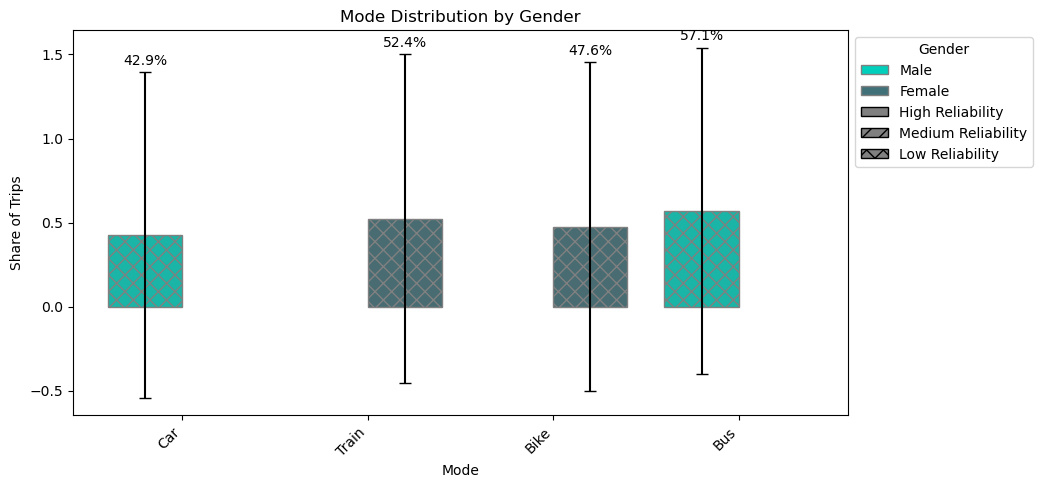

In [13]:
#plot a distribution of mode with gender as a hue, reliability statistics will be generated based on the groupings used.
mode_gender = plotter.plot_share_hue(df = data, group_cols = ['mode','gender'], weight_col = 'trip_weight')

Number of Survey Records
income_label  < $100K  > $100K
mode                          
Car                 0        1
Train               0        1
Bike                1        0
Bus                 0        1


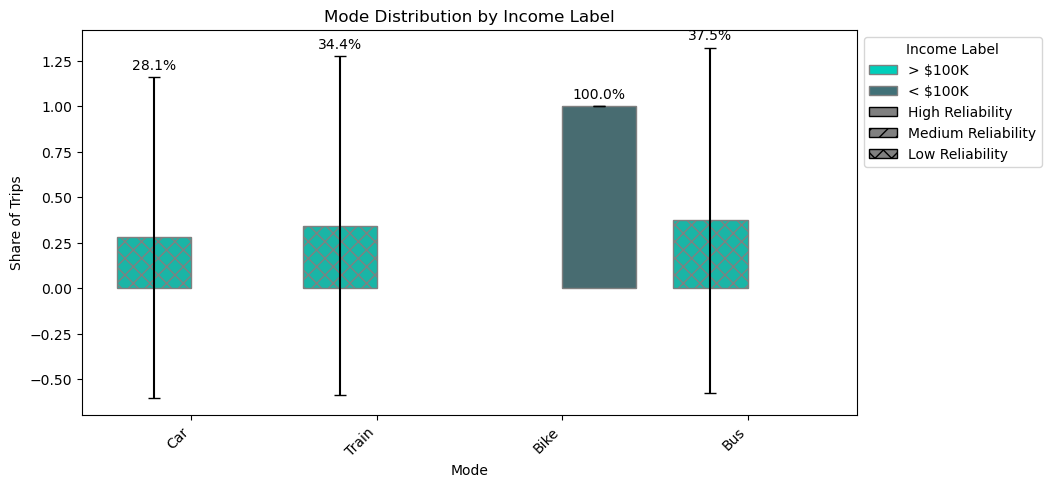

In [14]:
mode_income = plotter.plot_share_hue(df = data, group_cols = ['mode','income_label'], weight_col = 'trip_weight')

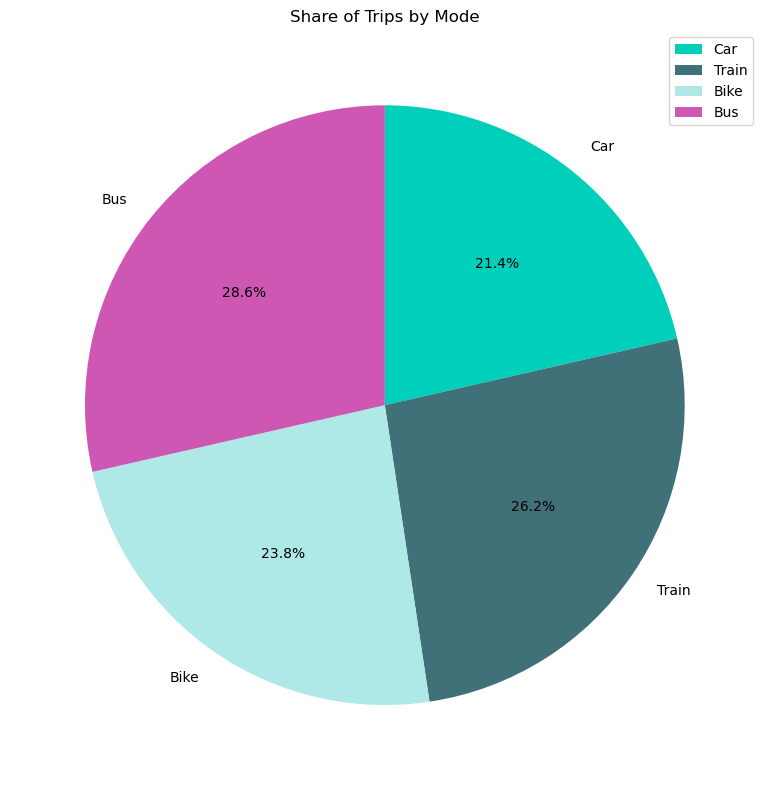

In [15]:
mode_pie = plotter.plot_share_pie(df = data, group_col = 'mode', weight_col = 'trip_weight')

In [17]:
#create a dashboard 
txt_overall = "This is an example of how to create a dashboard with a fake travel diary survey."
column1 = [("This is a title",True),
           txt_overall,
           [mode_gender, mode_income],
           mode_pie]
column2 = [("Another Title",True),
           "You can add more tabs with different plots.",
           [mode_gender, mode_income],
           mode_pie]
tabs = [{'title':'My First Tab',
         'columns':column1},
         {'title':'My second Tab',
          'columns':column2}
         ]
#create without saving
plotter.bokeh_dashboard(tabs , save_html=False)  # Specify map width for consistency
#create and save
# plotter.bokeh_dashboard(tabs , save_html=True, html_filename='visualizer.html')  # Specify map width for consistency